# Unit4 Examples

In [30]:
# Ten flips of a fair coin
# This example is to show different priors affect your belief
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm

## Unit 4.2

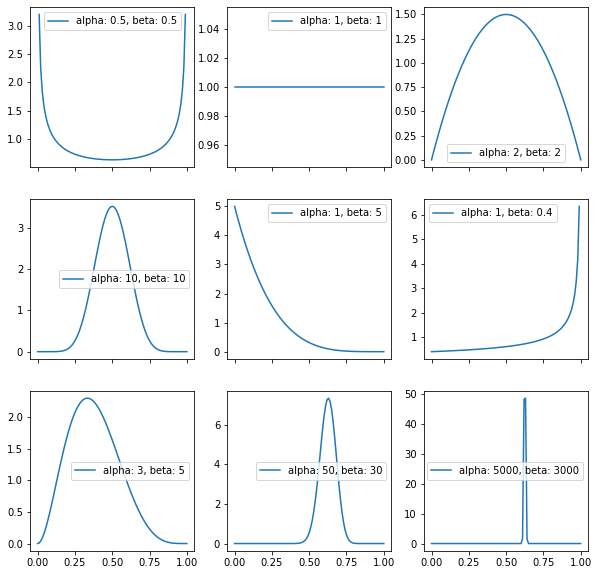

In [51]:
### 9 parameters

xx = [i for i in np.arange(0, 1.01, 0.01)]
yy = []
y = pm.Beta.dist(0.5, 0.5)

alpha = [0.5, 1, 2, 10, 1, 1, 3, 50, 5000]
beta = [0.5, 1, 2, 10, 5, 0.4, 5, 30, 3000]

fig, axs = plt.subplots(3, 3, figsize=(10, 10), sharex=True)
col_index = 0
row_index = 0

for i in range(len(alpha)):
    y = pm.Beta.dist(alpha[i], beta[i])
    yy = []
    for j in xx:
        yy.append(np.exp(y.logp(j).eval()))
    
    
    axs[row_index, col_index%3].plot(xx, yy)
    axs[row_index, col_index%3].legend(["alpha: {}, beta: {}".format(alpha[i], beta[i])])

    col_index += 1
    if col_index % 3 == 0:
        row_index += 1

plt.show()

Different priors belong to statistician belief. Of course, choosing an appropriate prior is important.

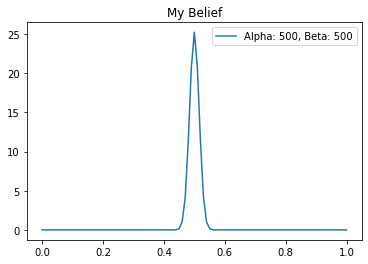

In [52]:
# Fair coin I believe mean is 1/2
xx = [i for i in np.arange(0, 1.01, 0.01)]
yy = []
y_belief = pm.Beta.dist(500, 500)

for i in xx:
    yy.append(np.exp(y_belief.logp(i).eval()))

plt.plot(xx, yy)
plt.title("My Belief")
plt.legend(["Alpha: 500, Beta: 500"])
plt.show()